# Multiview Multidimensional Scaling (MVMDS)

MVMDS is a useful multiview dimensionaltiy reduction algorithm that allows the user to perform Multidimensional Scaling on multiple views at the same time.

In [1]:
from mvlearn.datasets import load_UCImultifeature
from mvlearn.embed import MVMDS

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

%matplotlib inline

## Load Data
Data comes from UCI Digits Data. Contains 6 views and classifications of numbers 0-9

In [2]:
# Load full dataset, labels not needed
Xs, y = load_UCImultifeature()

In [3]:
# Check data
print(f'There are {len(Xs)} views.')
print(f'There are {Xs[0].shape[0]} observations')
print(f'The feature sizes are: {[X.shape[1] for X in Xs]}')

There are 6 views.
There are 2000 observations
The feature sizes are: [76, 216, 64, 240, 47, 6]


## Plotting MVMDS vs PCA

Here we demonstrate the superior performance of MVMDS on multi-view data against the performance of PCA. To use all the views' data in PCA, we concatenate the views into a larger data matrix.

Examples of 10-class and 4 class data are shown. MVMDS learns principle components that are common across views, and end up spreading the data better.

In [4]:
# MVMDS reduction
mvmds = MVMDS(n_components=2)
Xs_mvmds_reduced = mvmds.fit_transform(Xs)

# Concatenate views then PCA for comparison
Xs_concat = Xs[0]
for X in Xs[1:]:
    Xs_concat = np.hstack((Xs_concat, X))
pca = PCA(n_components=2)
Xs_pca_reduced = pca.fit_transform(Xs_concat)

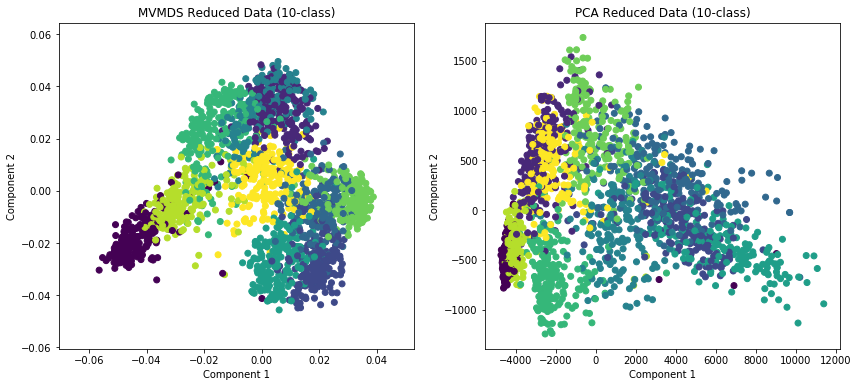

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].scatter(Xs_mvmds_reduced[:,0], Xs_mvmds_reduced[:,1], c=y)
ax[0].set_title("MVMDS Reduced Data (10-class)")
ax[0].set_xlabel("Component 1")
ax[0].set_ylabel("Component 2")
ax[1].scatter(Xs_pca_reduced[:,0], Xs_pca_reduced[:,1], c=y)
ax[1].set_title("PCA Reduced Data (10-class)")
ax[1].set_xlabel("Component 1")
ax[1].set_ylabel("Component 2")

plt.show()

In [6]:
# 4-class data
Xs_4, y_4 = load_UCImultifeature(select_labeled=[0,1,2,3])

In [7]:
# MVMDS reduction
mvmds = MVMDS(n_components=2)
Xs_mvmds_reduced = mvmds.fit_transform(Xs_4)

# Concatenate views then PCA for comparison
Xs_concat = Xs_4[0]
for X in Xs_4[1:]:
    Xs_concat = np.hstack((Xs_concat, X))
pca = PCA(n_components=2)
Xs_pca_reduced = pca.fit_transform(Xs_concat)

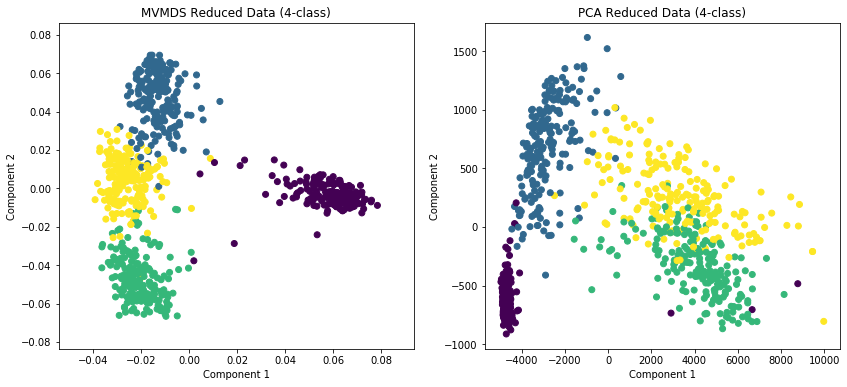

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].scatter(Xs_mvmds_reduced[:,0], Xs_mvmds_reduced[:,1], c=y_4)
ax[0].set_title("MVMDS Reduced Data (4-class)")
ax[0].set_xlabel("Component 1")
ax[0].set_ylabel("Component 2")
ax[1].scatter(Xs_pca_reduced[:,0], Xs_pca_reduced[:,1], c=y_4)
ax[1].set_title("PCA Reduced Data (4-class)")
ax[1].set_xlabel("Component 1")
ax[1].set_ylabel("Component 2")

plt.show()

## Components of MVMDS Views Without Noise

Here we will take into account all of the views and perform MVMDS. This dataset does not contain noise and each view performs decently well in predicting the number. Therefore we will expect the common components created by MVMDS to create a strong representation of the data *(Note MVMDS only uses the fit_transform function to properly return the correct components)*

In the cell after, PCA on one view is shown for comparison. It can be seen that MVMDS seems to perform better in this instance. 

*Note: Each color represents a unique number class*



In [9]:
#perform mvmds
mvmds = MVMDS(n_components=5)
Components = mvmds.fit_transform(Xs)

Text(0.5, 1.0, 'First 4 MVMDS Components Computed With 6 Views (No Noise)')

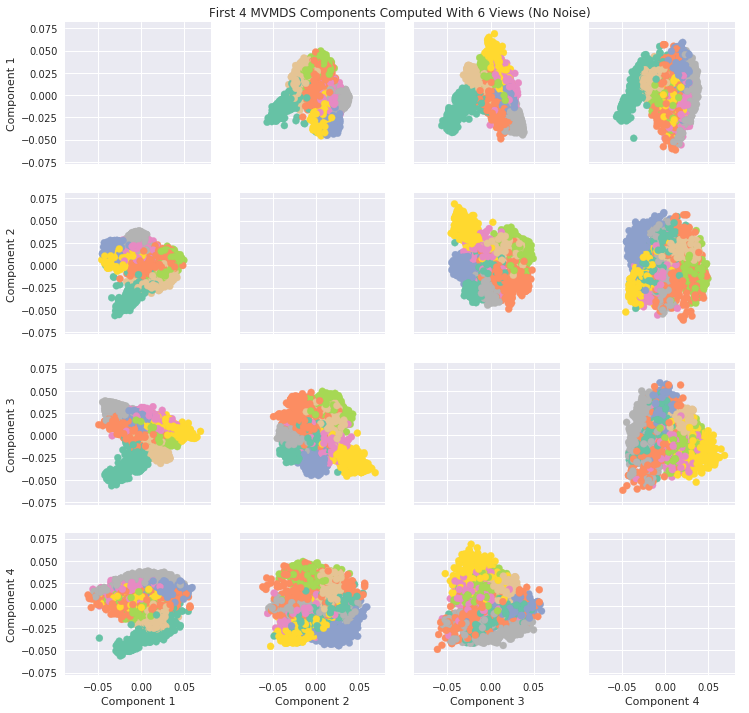

In [11]:
# Plot MVMDS images

plt.style.use('seaborn')

color_map = [sns.color_palette("Set2", 10)[int(i)] for i in y]

fig, axes = plt.subplots(4, 4, figsize = (12,12), sharey=True, sharex=True)

for i in range(4):
    for j in range(4):
        if i != j:
            axes[i,j].scatter(x = Components[:, i], y = Components[:, j], alpha = 1, label = y, color = color_map)
        axes[3, j].set_xlabel(f'Component {j+1}')
    axes[i,0].set_ylabel(f'Component {i+1}')


ax = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax.set_title('First 4 MVMDS Components Computed With 6 Views (No Noise)')

Text(0.5, 1.0, 'First 4 PCA Components Computed With 1 View')

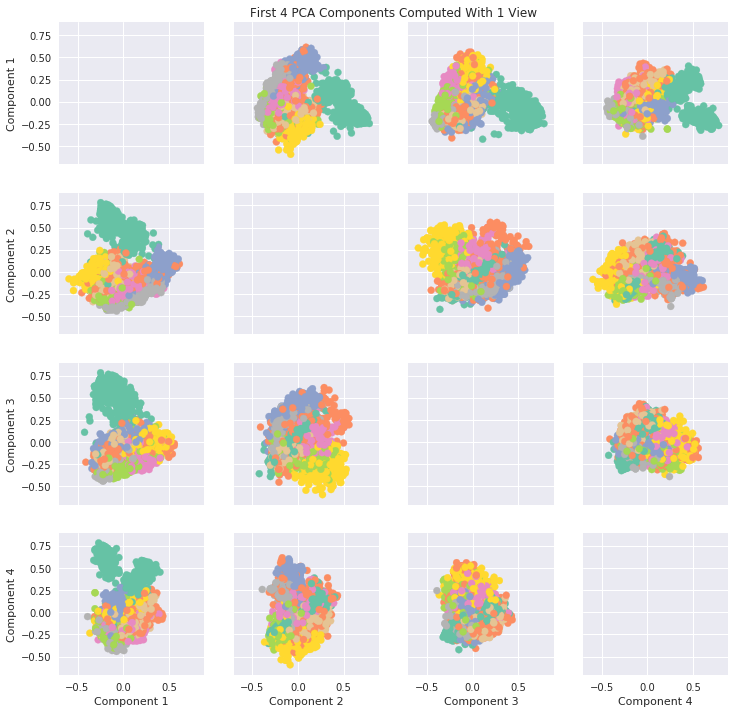

In [12]:
#PCA Plots

pca = PCA(n_components=6)
pca_Components = pca.fit_transform(Xs[0])

fig, axes = plt.subplots(4, 4, figsize = (12,12), sharey=True, sharex=True)

for i in range(4):
    for j in range(4):
        if i != j:
            axes[i,j].scatter(x = pca_Components[:, i], y = pca_Components[:, j], alpha = 1, label = y, color = color_map)
        axes[3, j].set_xlabel(f'Component {j+1}')
    axes[i,0].set_ylabel(f'Component {i+1}')

ax = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax.set_title('First 4 PCA Components Computed With 1 View')